In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics, model_selection
import lightgbm as lgb
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, LayerNormalization
from keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import StandardScaler

In [2]:
train_logs = pd.read_csv("train_logs.csv")
train_logs.head()

for column in ['down_time', 'action_time', 'up_time']:
    train_logs[column] = train_logs[column] / 1000.0

In [3]:
train_scores = pd.read_csv("train_scores.csv")
train_scores.head()

,id,score
0,001519c8,3.5
1,0022f953,3.5
2,0042269b,6.0
3,0059420b,2.0
4,0075873a,4.0


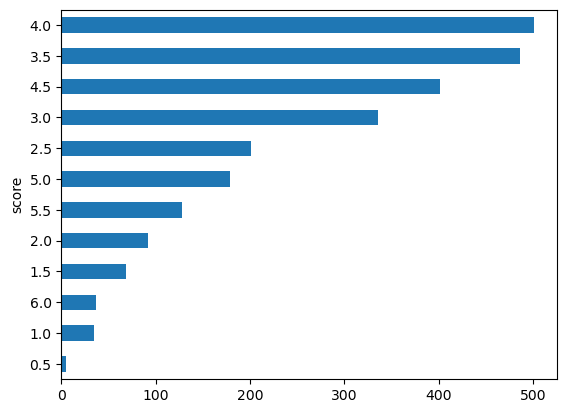

In [4]:
train_scores['score'].value_counts().sort_values().plot(kind='barh')
plt.show()

In [5]:
id0_5 = train_scores[train_scores['score'] == 0.5]['id'].to_list()
id1_0 = train_scores[train_scores['score'] == 1.0]['id'].to_list()
id1_5 = train_scores[train_scores['score'] == 1.5]['id'].to_list()
id2_0 = train_scores[train_scores['score'] == 2.0]['id'].to_list()
id2_5 = train_scores[train_scores['score'] == 2.5]['id'].to_list()
id3_0 = train_scores[train_scores['score'] == 3.0]['id'].to_list()
id3_5 = train_scores[train_scores['score'] == 3.5]['id'].to_list()
id4_0 = train_scores[train_scores['score'] == 4.0]['id'].to_list()
id4_5 = train_scores[train_scores['score'] == 4.5]['id'].to_list()
id5_0 = train_scores[train_scores['score'] == 5.0]['id'].to_list()
id5_5 = train_scores[train_scores['score'] == 5.5]['id'].to_list()
id6_0 = train_scores[train_scores['score'] == 6.0]['id'].to_list()

In [6]:
print(train_logs[train_logs['id'].isin(id0_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id1_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id1_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id2_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id2_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id3_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id3_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id4_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id4_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id5_0)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id5_5)].groupby('id')['word_count'].max().mean())
print(train_logs[train_logs['id'].isin(id6_0)].groupby('id')['word_count'].max().mean())

231.4
218.45714285714286
245.85507246376812
237.5108695652174
257.7014925373134
284.44940476190476
345.119341563786
401.5329341317365
481.84328358208955
548.6983240223464
641.1015625
695.7027027027027


In [7]:
print(train_logs[train_logs['id'].isin(id0_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id1_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id1_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id2_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id2_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id3_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id3_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id4_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id4_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id5_0)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id5_5)].groupby('id')['event_id'].max().mean())
print(train_logs[train_logs['id'].isin(id6_0)].groupby('id')['event_id'].max().mean())

1571.6
1852.3714285714286
2097.289855072464
1997.9239130434783
2298.9950248756218
2537.8839285714284
3015.9732510288068
3554.7784431137725
4184.850746268657
4727.731843575419
5504.703125
5675.0


In [8]:
print(train_logs[train_logs['id'].isin(id0_5)].groupby('id')['activity'].value_counts())

id        activity     
1ebb9b74  Input            1289
          Remove/Cut         93
          Nonproduction      19
315bdafd  Input            1214
          Remove/Cut        130
          Nonproduction      35
3bda31e6  Input            1426
          Remove/Cut        125
          Nonproduction      47
40b28508  Input            1809
          Nonproduction     127
          Remove/Cut         61
c3663a2d  Input            1186
          Nonproduction     270
          Remove/Cut         27
Name: count, dtype: int64


In [9]:
print(train_logs[train_logs['id'].isin(id6_0)].groupby('id')['activity'].value_counts())

id        activity     
0042269b  Input            3515
          Remove/Cut        439
          Nonproduction     175
          Replace             7
044b274d  Input            4653
                           ... 
f9fd3268  Remove/Cut        870
          Nonproduction     411
fa489e99  Input            8622
          Remove/Cut       1238
          Nonproduction     286
Name: count, Length: 141, dtype: int64


In [10]:
print(train_logs[train_logs['id'].isin(id0_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id1_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id1_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id2_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id2_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id3_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id3_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id4_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id4_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id5_0)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id5_5)].groupby('id')['action_time'].sum().mean())
print(train_logs[train_logs['id'].isin(id6_0)].groupby('id')['action_time'].sum().mean())

170.0146
195.56257142857143
200.04436231884057
196.7087608695652
229.20283582089553
257.8847797619047
299.99428395061733
354.45059481037924
400.3463407960199
445.52749720670386
532.3988046874999
539.6108918918919


In [11]:
train_logs.columns

Index(['id', 'event_id', 'down_time', 'up_time', 'action_time', 'activity',
       'down_event', 'up_event', 'text_change', 'cursor_position',
       'word_count'],
      dtype='object')

In [12]:
from essay_processor import EssayProcessor

train_essays = pd.read_csv('train_essays_02.csv')
train_essays.index = train_essays["Unnamed: 0"]
train_essays.index.name = None
train_essays.drop(columns=["Unnamed: 0"], inplace=True)
print(train_essays.head())

essay_processor = EssayProcessor()
train_sent_agg_df = essay_processor.sentence_processor(df=train_essays)
train_paragraph_agg_df = essay_processor.paragraph_processor(df=train_essays)

                                                      essay
001519c8  qqqqqqqqq qq qqqqq qq qqqq qqqq.  qqqqqq qqq q...
0022f953  qqqq qq qqqqqqqqqqq ? qq qq qqq qqq qqq, qqqqq...
0042269b  qqqqqqqqqqq qq qqqqq qqqqqqqqq qq qqqqqqqqqqq ...
0059420b  qq qqqqqqq qqqqqq qqqqqqqqqqqqq qqqq q qqqq qq...
0075873a  qqqqqqqqqqq qq qqq qqqqq qq qqqqqqqqqq, qqq qq...
The shape of sent agg: (2471, 20)
The shape of paragraph agg: (2471, 28)


In [13]:
def classification_score_features_all(df):
    def generate_features(group):
        features = {}
        features['max_word_count'] = group['word_count'].max()
        features['max_event_id'] = group['event_id'].max()
        features['max_up_time'] = group['up_time'].max()
        features['sum_action_time'] = group['action_time'].sum()
        features['max_cursor_position'] = group['cursor_position'].max()
        features['word_per_event'] = features['max_word_count'] / features['max_event_id']
        features['word_per_action_time'] = features['max_word_count'] / features['sum_action_time']
        features['word_per_total_time'] = features['max_word_count'] / features['max_up_time']
        return pd.Series(features)
    return df.groupby('id').apply(generate_features)

feats = pd.DataFrame({'id': train_logs['id'].unique().tolist()})

tmp_df = classification_score_features_all(train_logs)
feats = feats.merge(tmp_df, on='id', how='left')
feats = feats.merge(train_scores, on='id', how='left')
feats = feats.merge(train_sent_agg_df, on="id", how="left")
feats = feats.merge(train_paragraph_agg_df, on="id", how="left")
feats = feats.fillna(0.0)
feats.head()

,id,max_word_count,max_event_id,max_up_time,sum_action_time,max_cursor_position,word_per_event,word_per_action_time,word_per_total_time,score,...,paragraph_word_count_max,paragraph_word_count_first,paragraph_word_count_last,paragraph_word_count_sem,paragraph_word_count_q1,paragraph_word_count_median,paragraph_word_count_q3,paragraph_word_count_skew,paragraph_word_count_sum,paragraph_word_count_kurtosis_func
0,001519c8,256.0,2557.0,1801.969,297.243,1539.0,0.100117,0.861248,0.142067,3.5,...,112,71,86,11.976829,78.50,86.0,99.00,0.770543,269,0.000000
1,0022f953,323.0,2454.0,1788.969,275.391,1676.0,0.131622,1.172878,0.180551,3.5,...,96,53,60,8.316316,47.75,56.5,62.25,1.299614,355,2.342703
2,0042269b,404.0,4136.0,1771.669,421.201,2291.0,0.097679,0.959162,0.228034,6.0,...,88,79,45,6.926599,55.50,73.5,78.75,-0.502908,410,-1.536764
3,0059420b,206.0,1556.0,1404.469,189.596,1047.0,0.132391,1.086521,0.146675,2.0,...,81,62,65,5.897269,63.50,65.0,73.00,1.565482,208,0.000000
4,0075873a,252.0,2531.0,1662.472,313.702,1402.0,0.099565,0.803310,0.151582,4.0,...,114,61,3,18.706683,26.00,52.0,61.00,0.686760,256,0.722916


In [14]:
# def convert_score_to_class(score):
#     return int(score / 0.5) - 1

# feats['score'] = feats['score'].apply(convert_score_to_class)
feats.head()

,id,max_word_count,max_event_id,max_up_time,sum_action_time,max_cursor_position,word_per_event,word_per_action_time,word_per_total_time,score,...,paragraph_word_count_max,paragraph_word_count_first,paragraph_word_count_last,paragraph_word_count_sem,paragraph_word_count_q1,paragraph_word_count_median,paragraph_word_count_q3,paragraph_word_count_skew,paragraph_word_count_sum,paragraph_word_count_kurtosis_func
0,001519c8,256.0,2557.0,1801.969,297.243,1539.0,0.100117,0.861248,0.142067,3.5,...,112,71,86,11.976829,78.50,86.0,99.00,0.770543,269,0.000000
1,0022f953,323.0,2454.0,1788.969,275.391,1676.0,0.131622,1.172878,0.180551,3.5,...,96,53,60,8.316316,47.75,56.5,62.25,1.299614,355,2.342703
2,0042269b,404.0,4136.0,1771.669,421.201,2291.0,0.097679,0.959162,0.228034,6.0,...,88,79,45,6.926599,55.50,73.5,78.75,-0.502908,410,-1.536764
3,0059420b,206.0,1556.0,1404.469,189.596,1047.0,0.132391,1.086521,0.146675,2.0,...,81,62,65,5.897269,63.50,65.0,73.00,1.565482,208,0.000000
4,0075873a,252.0,2531.0,1662.472,313.702,1402.0,0.099565,0.803310,0.151582,4.0,...,114,61,3,18.706683,26.00,52.0,61.00,0.686760,256,0.722916


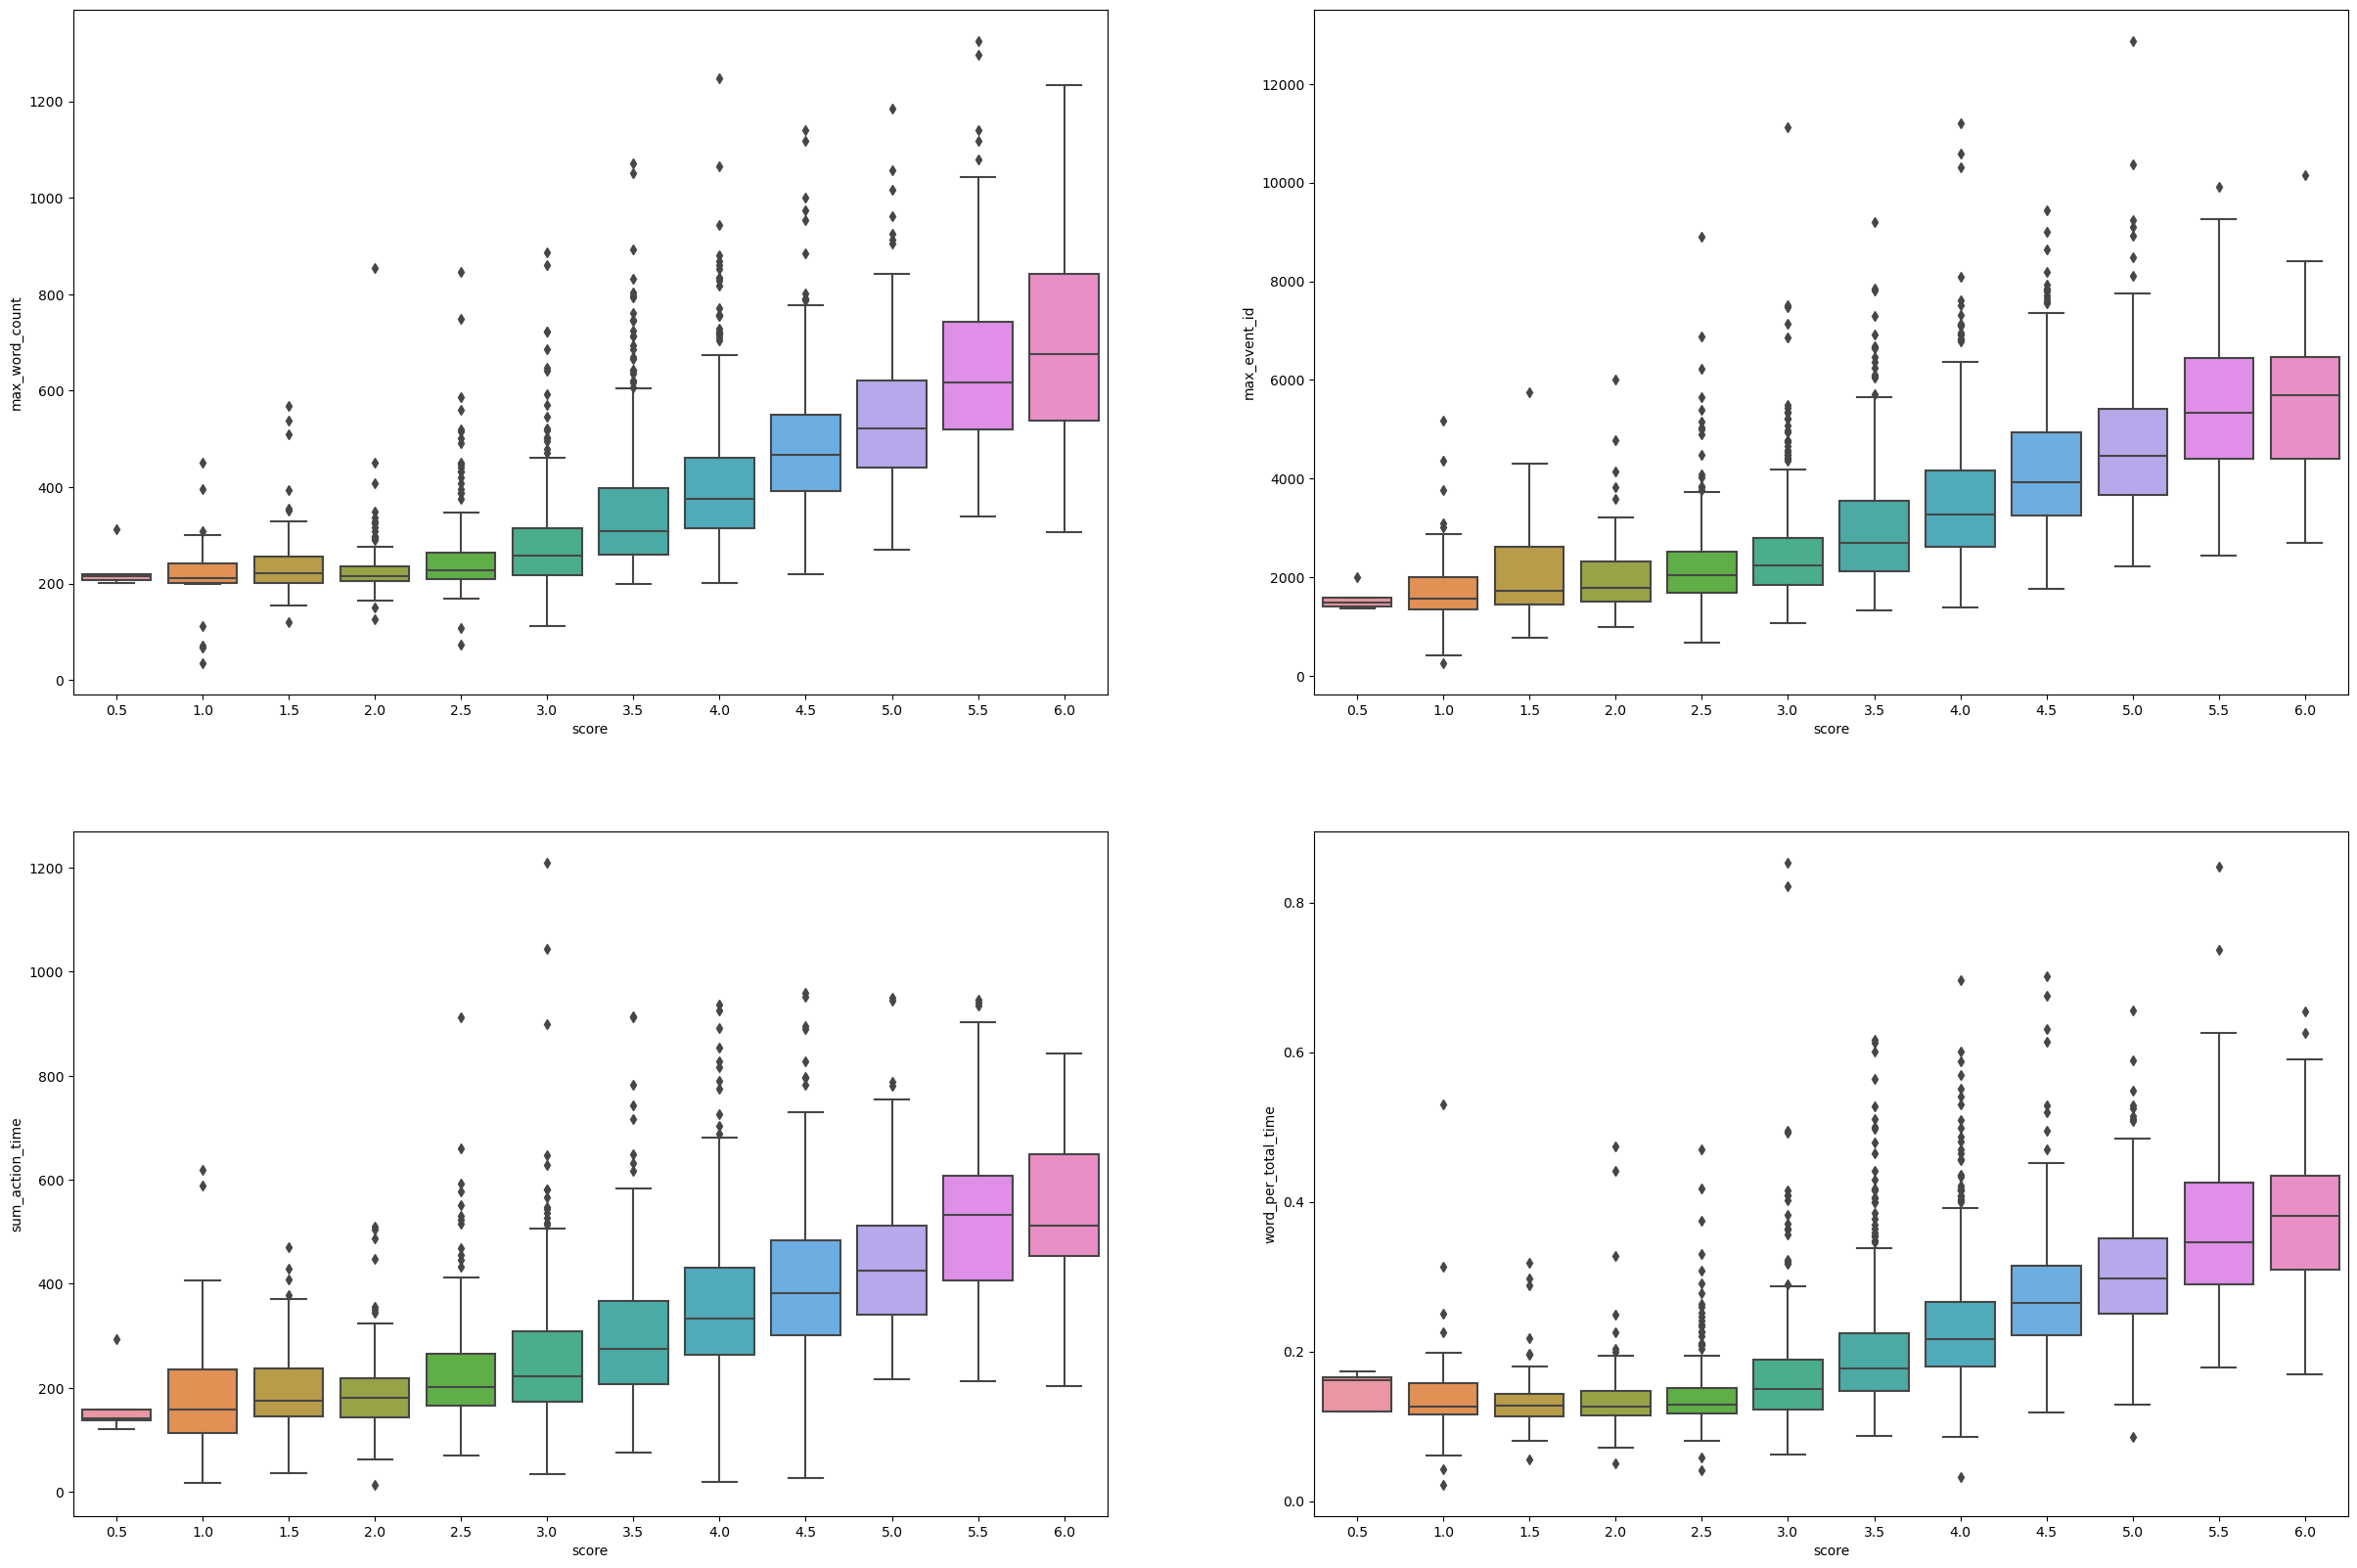

In [15]:
plt.figure(figsize=(30, 20))
plt.subplot(2, 2, 1)
sns.boxplot(
    data=feats,
    x='score',
    y='max_word_count'
)
plt.subplot(2, 2, 2)
sns.boxplot(
    data=feats,
    x='score',
    y='max_event_id'
)
plt.subplot(2, 2, 3)
sns.boxplot(
    data=feats,
    x='score',
    y='sum_action_time'
)
plt.subplot(2, 2, 4)
sns.boxplot(
    data=feats,
    x='score',
    y='word_per_total_time'
)
plt.show()

In [16]:
train_feats = feats.copy()
# train_feats['score'] = train_feats['score'].astype('category')
target_col = 'score'
drop_cols = 'id'
train_cols = [col for col in train_feats.columns if col not in target_col + drop_cols]
train_feats.head()
train_feats.dtypes
train_feats.shape

(2471, 56)

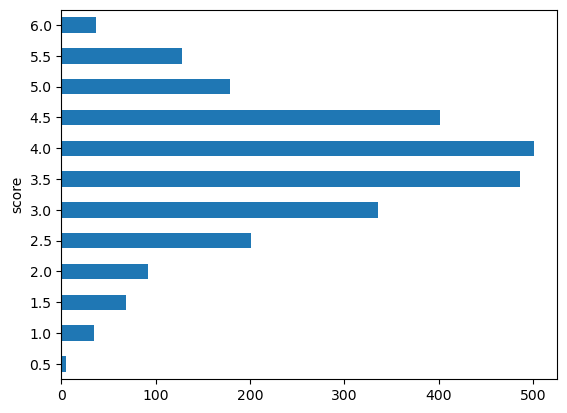

In [17]:
train_feats['score'].value_counts().sort_index().plot(kind="barh")
plt.show()

In [19]:
target_col = ['score']
drop_cols = ['id']
train_cols = [col for col in train_feats.columns if col not in target_col + drop_cols]

EPOCHS = 1
SPLIT = 10

test_prediction_list = []
model_dict = {}
scores = []
preds = np.zeros((len(train_feats), 1))

best_params = {
    'reg_alpha': 0.6016917340618352, 
    'reg_lambda': 3.8071290717767194, 
    'colsample_bytree': 0.45216556596658897, 
    'subsample': 0.4832292138435902, 
    'learning_rate': 0.001,
    'num_leaves': 11, 
    'max_depth': 27, 
    'min_child_samples': 17,
    'n_jobs': 4
}

for i in range(EPOCHS):
    kf = model_selection.KFold(n_splits=SPLIT, random_state=42 + i * 10, shuffle=True)
    valid_preds = np.zeros(train_feats.shape[0])
    
    for fold, (train_idx, valid_idx) in enumerate(kf.split(train_feats)):
        print(f'Epoch: {i + 1} Fold: {fold + 1}')
        X_train, y_train = train_feats.iloc[train_idx][train_cols], train_feats.iloc[train_idx][target_col]
        X_valid, y_valid = train_feats.iloc[valid_idx][train_cols], train_feats.iloc[valid_idx][target_col]
        params = {
            "objective": "regression",
            "metric": "rmse",
            "random_state": 42,
            "n_estimators": 11_861,
            "verbosity": 1,
            **best_params
        }
        model = lgb.LGBMRegressor(**params)
        early_stopping_callback = lgb.early_stopping(100, first_metric_only=True, verbose=True)
        
        model.fit(
            X_train, y_train,
            eval_set=[(X_valid, y_valid)],
            callbacks=[early_stopping_callback],
        )
        
        valid_predict = model.predict(X_valid)
        valid_preds[valid_idx] = valid_predict
        preds[valid_idx, 0] += valid_predict / EPOCHS
        
        score = metrics.mean_squared_error(y_valid, valid_predict, squared=False)
        model_dict[f'Epoch{i + 1}-Fold{fold + 1}'] = model
        
    final_score = metrics.mean_squared_error(train_feats[target_col], valid_preds, squared=False)
    scores.append(final_score)
    
print("Avg Loss:", np.mean(scores))

print('metric LGBM = {:.5f}'.format(metrics.mean_squared_error(train_feats[target_col], preds[:, 0], squared=False)))

Epoch: 1 Fold: 1
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000853 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12077
[LightGBM] [Info] Number of data points in the train set: 2223, number of used features: 54
[LightGBM] [Info] Start training from score 3.706928
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[7817]	valid_0's rmse: 0.62614
Evaluated only: rmse
Epoch: 1 Fold: 2
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000305 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12080
[LightGBM] [Info] Number of data points in the train set: 2224, number of used features: 54
[LightGBM] [Info] Start training from score 3.713579
Training until validation scores don't improve for 100 rounds
Early stopping, best iteration is:
[6702]	valid_0's rmse: 0.551829
Eval

In [ ]:
# EPOCHS = 1
# SPLIT = 10

# model_dict = {}
# scores = []
# preds = np.zeros((len(train_feats), 1))

# # best_params = {
# #     'reg_alpha': 0.6016917340618352, 
# #     'reg_lambda': 3.8071290717767194, 
# #     'colsample_bytree': 0.45216556596658897, 
# #     'subsample': 0.4832292138435902, 
# #     'learning_rate': 0.001,
# #     'num_leaves': 11, 
# #     'max_depth': 27, 
# #     'min_child_samples': 17,
# #     'n_jobs': 4
# # }

# for i in range(EPOCHS):
#     kf = model_selection.KFold(n_splits=SPLIT, random_state=42 + i * 10, shuffle=True)
#     valid_preds = np.zeros(train_feats.shape[0])
    
#     for fold, (train_idx, valid_idx) in enumerate(kf.split(train_feats)):
#         print(f'Epoch: {i + 1} Fold: {fold + 1}')
#         X_train, y_train = train_feats.iloc[train_idx][train_cols], train_feats.iloc[train_idx][target_col]
#         X_valid, y_valid = train_feats.iloc[valid_idx][train_cols], train_feats.iloc[valid_idx][target_col]
#         print(len(np.unique(y_train)))
        
#         params = {
#             "objective": "binary" if len(np.unique(y_train)) == 2 else "multiclass",
#             "metric": "binary_logloss" if len(np.unique(y_train)) == 2 else "multi_logloss",
#             "random_state": 42,
#             "n_estimators": 11_861,
#             "verbosity": -1,
#             # **best_params
#         }

#         model = lgb.LGBMClassifier(**params)
#         early_stopping_callback = lgb.early_stopping(100, verbose=True)
        
#         model.fit(
#             X_train, y_train,
#             eval_set=[(X_valid, y_valid)],
#             callbacks=[early_stopping_callback]
#         )
        
#         valid_predict = model.predict(X_valid)
#         valid_preds[valid_idx] = valid_predict
#         preds[valid_idx, 0] += valid_predict
        
#         score = metrics.accuracy_score(y_valid, valid_predict)
#         model_dict[f'Epoch{i + 1}-Fold{fold + 1}'] = model
        
#     final_score = metrics.accuracy_score(train_feats[target_col], valid_preds)
#     scores.append(final_score)
    
# print("Avg Acc:", np.mean(scores))

# print('metric LGBM = {:.5f}'.format(metrics.accuracy_score(train_feats[target_col], preds[:, 0])))

In [ ]:
# train_feats['score'] = train_feats['score'].astype(float)
# train_feats = train_feats[(train_feats['score'] >= 5) & (train_feats['score'] <= 8)]
# train_feats['score'] = train_feats['score'] - 5
# train_feats['score'] = train_feats['score'].astype('category')
# train_feats.shape

In [ ]:
# X = train_feats[train_cols]
# y = train_feats[target_col]
# X = X.to_numpy() if isinstance(X, pd.DataFrame) else X
# # scaler = StandardScaler()
# # X = scaler.fit_transform(X)
# print(X[0])
# y = y.to_numpy() if isinstance(y, pd.DataFrame) else y
# print(X.shape, y.shape)

# y_categorical = to_categorical(y)
# class_weights = compute_class_weight(
#     class_weight='balanced',
#     classes=np.unique(y),
#     y=y
# )
# class_weights = dict(enumerate(class_weights))
# print(class_weights)
# print(np.unique(y))

# def create_model(input_shape):
#     model = Sequential()
#     model.add(Dense(64, activation='relu', input_shape=input_shape))
#     model.add(LayerNormalization())
#     model.add(Dense(64, activation='relu'))
#     model.add(LayerNormalization())
#     model.add(Dropout(0.2))
#     model.add(Dense(128, activation='relu'))
#     model.add(LayerNormalization())
#     model.add(Dropout(0.2))
#     model.add(Dense(64, activation='relu'))
#     model.add(LayerNormalization())
#     model.add(Dropout(0.2))
#     model.add(Dense(4, activation='softmax'))

#     optimizer = tf.keras.optimizers.Adam(learning_rate=0.005)

#     model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
#     return model

# kf = model_selection.KFold(n_splits=5, shuffle=True, random_state=42)

# fold = 0
# for train_index, test_index in kf.split(X):
#     fold += 1
#     print(f"Training on fold {fold}...")
    
#     X_train, X_test = X[train_index], X[test_index]
#     y_train, y_test = y_categorical[train_index], y_categorical[test_index]
    
#     model = create_model((54,))
    
#     model.fit(
#         X_train, y_train, 
#         class_weight=class_weights, 
#         epochs=200, 
#         batch_size=32, 
#         validation_data=(X_test, y_test)
#     )